<center><h1> Empirical Assignment 4</h1></center>

**Author(s):**
1. Robin Fu (robin.fu@emory.edu)

**Objectives**: This <ins>assignment</ins> aims at
 1. Learning how to adapt other people's code to one needs;
 2. Use *GitHub* to retrieve and submit computer code.

**Instructions**:
 1. Please write down your Python code and <ins>execute</ins> it in the cell below each question.
 
 **Data Source**: [Introductory Econometrics: A Modern Approach](https://cran.r-project.org/web/packages/wooldridge/index.html) by Jeffrey Wooldridge

**Data Description**: ```http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1.dta```

```
Contains data from hprice1.dta
  obs:            88                          
 vars:            10                          17 Mar 2002 12:21
 size:         3,168 (99.5% of memory free)
-------------------------------------------------------------------------------
              storage  display     value
variable name   type   format      label      variable label
-------------------------------------------------------------------------------
price           float  %9.0g                  house price, $1000s
assess          float  %9.0g                  assessed value, $1000s
bdrms           byte   %9.0g                  number of bdrms
lotsize         float  %9.0g                  size of lot in square feet
sqrft           int    %9.0g                  size of house in square feet
colonial        byte   %9.0g                  =1 if home is colonial style
lprice          float  %9.0g                  log(price)
lassess         float  %9.0g                  log(assess
llotsize        float  %9.0g                  log(lotsize)
lsqrft          float  %9.0g                  log(sqrft)
-------------------------------------------------------------------------------
Sorted by:  
 ```
 
 **Background**: Consider the general model
 
 $$
\begin{aligned}
\texttt{lprice} &= \beta_{0} + \beta_{1}\texttt{llotsize} +  \beta_{2}\texttt{lsqrft} +\beta_{3}\texttt{colonial}+\beta_{4}\texttt{bdrms}\\
&+ \beta_{5}\texttt{colonial}\times\texttt{llotsize}+ \beta_{6}\texttt{colonial}\times\texttt{lsqrft}++ \beta_{7}\texttt{colonial}\times\texttt{bdrms}+ e.
\end{aligned}
$$

You now know that a relatively unknown _alternative_ measure of fit, $\widetilde{R}^2$, is defined as

$$
\widetilde{R}^{2}=1-\frac{\sum_{i=1}^{n} \widetilde{e}_{i}^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}},
$$

where $\{\widetilde{e}_i;i=1,\dots,n\}$ are the _prediction errors_ previously discussed in class, and $\{y_i;i=1,\dots,n\}$ represents the elements $\{\texttt{lprice} _i;i=1,\dots,n\}$ in the ```hprice1``` data set. Recall that $\widetilde{R}^2$ estimates the percentage of the forecast variance which is explained by the regression forecast. You think this is a better measure of _fitness_ than the $RSS$ or the classical $R^2$.
 
<center><h2> Questions</h2></center>

1. [15 points] Proceed to modify the previously defined ```processSubset``` Python function so it returns this new quantity $\widetilde{R}^2$ instead of the $RSS$ (called ```ssr``` by the ```statsmodels``` library).

In [1]:
#Import all needed packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import itertools
import patsy

hprice1 = pd.read_stata('http://fmwww.bc.edu/ec-p/data/wooldridge/hprice1.dta')
hprice1['collotsz'] = hprice1.colonial * hprice1.llotsize
hprice1['collsqrt'] = hprice1.colonial * hprice1.lsqrft
hprice1['colbdrms'] = hprice1.colonial * hprice1.bdrms
f = 'lprice ~ llotsize + lsqrft + colonial + bdrms + collotsz + collsqrt + colbdrms'
y1, X1 = patsy.dmatrices(f, data = hprice1, return_type = 'dataframe')
y = y1.sub(y1.mean())
X = X1.sub(X1.mean()).drop('Intercept',axis=1)

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,sm.add_constant(X[list(feature_set)])) #including intercept in model; same model selected if w/o intercept
    regr = model.fit() #fits the model, creates fitted OLS object
    e_tilde = regr.resid/(1- regr.get_influence().hat_matrix_diag)
    R2_tilde = 1 - (sum(e_tilde**2)/regr.centered_tss)#gets residual sum squared
    return {"model":regr, "R2":R2_tilde}

processSubset(X)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x13f7dc90f08>,
 'R2': 0.45284725267900017}

2. [35 points] Using the entire set of 88 observations proceed to find out all the best 7 specifications using the **Best Subset Selection** algorithm discussed in class that utilizes the proposed $\widetilde{R}^2$ measure of fit instead. *Note*: All these 7 specifications must contain an intercept per our discussion in class.

In [2]:
def getBest(p):
    
    results = []
    
    for combo in itertools.combinations(X.columns, p): #gets all combinations of X.columns w/p spots
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    # Choose the model with the highest R2
    best_model = models.loc[models['R2'].argmax()]
    
    print("Processed", models.shape[0], "models on", p, "predictors")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_best = pd.DataFrame(columns=["R2", "model"])

for i in range(1,8):
    models_best.loc[i] = getBest(i)
    
models_best

Processed 7 models on 1 predictors
Processed 21 models on 2 predictors
Processed 35 models on 3 predictors
Processed 35 models on 4 predictors
Processed 21 models on 5 predictors
Processed 7 models on 6 predictors
Processed 1 models on 7 predictors


,R2,model
1,0.527653,<statsmodels.regression.linear_model.Regressio...
2,0.604636,<statsmodels.regression.linear_model.Regressio...
3,0.604009,<statsmodels.regression.linear_model.Regressio...
4,0.597532,<statsmodels.regression.linear_model.Regressio...
5,0.579477,<statsmodels.regression.linear_model.Regressio...
6,0.552883,<statsmodels.regression.linear_model.Regressio...
7,0.452847,<statsmodels.regression.linear_model.Regressio...


3. [50 points] For each of the best 7 specifications you found to maximize the forecast variance that is explained by the regression forecast in the previous question, proceed to calculate the cross-validated errors in a $10$-fold (using a seed equal to $42$). For example, let's assume that the best model that includes just one regressor using the entire sample of 88 observations and the $\widetilde{R}^2$ is the model that regresses ```lprice``` on ```colonial```. Using the partition of the first fold, proceed to use the 90% of the observations to fit this model and then predict the ```lprice``` in the remaining 10% in this fold, and modified *again* your ```processSubset``` function to return the RSS, see, e.g., the Python code in the lecture notes. Save this value and then do the same for the next fold, save this value, and continue doing it till you have 10 RSS values corresponding to the $10$-fold. Average these 10 values and save it. Then do the same with the best model you found that contains 2 regressors, then the best that contains 3 regressors, and so on till you do the same for the complete model with 7 features. Plot these average values and proceed to report the model with the *smallest* cross-validated error. Then fit (```.summary()```) this *best* model using the entire sample.

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     52.32
Date:                Fri, 06 Mar 2020   Prob (F-statistic):           3.59e-19
Time:                        22:45:12   Log-Likelihood:                 26.912
No. Observations:                  88   AIC:                            -45.82
Df Residuals:                      84   BIC:                            -35.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4215      0.602     -2.360      0.0

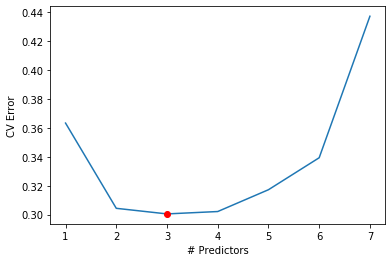

In [3]:
k = 10
cv_errors = pd.DataFrame(columns=range(1,k+1), index=range(1,8))
KF = skms.KFold(n_splits = k, shuffle = True, random_state = 42)

#Takes a model and fits specific train and test sets
def processFolds(feature_set, X_train, y_train, X_test, y_test):
    model = sm.OLS(y_train,X_train[list(feature_set)]) 
    regr = model.fit() 
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test.iloc[:,0])**2).sum()
    return RSS

#Takes a model and runs each k-fold using processFolds function
def iterFolds(fitted_model):
    results = []
    for train, test in KF.split(range(int(fitted_model.nobs))):
        results.append(processFolds(fitted_model.model.exog_names[1:], 
                                    X.iloc[train], y.iloc[train],
                                    X.iloc[test], y.iloc[test]))
    return results

#Add results to cv errors for each model in models_best
for i in range(1,len(models_best)+1):
    fitted_model = models_best.loc[i,'model']
    cv_errors.loc[i] = iterFolds(fitted_model)

cv_mean = cv_errors.apply(np.mean, axis=1)

plt.plot(cv_mean)
plt.xlabel('# Predictors')
plt.ylabel('CV Error')
plt.plot(cv_mean.argmin()+1, cv_mean.min(), "or")

print(sm.OLS(y1,sm.add_constant(X1[models_best.loc[3,'model'].model.exog_names[1:]])).fit().summary())